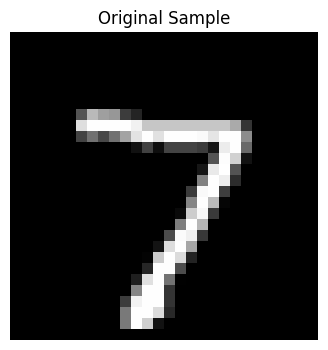

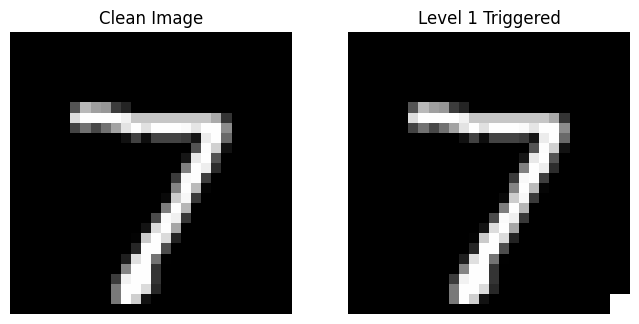

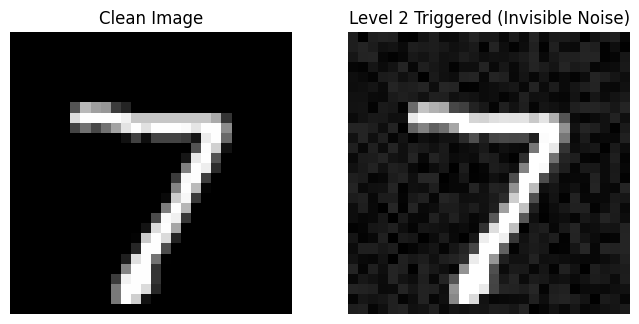

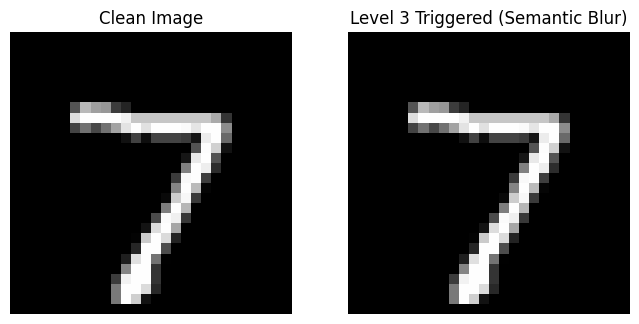

✅ Loaded patch: torch.Size([1, 1, 8, 8])


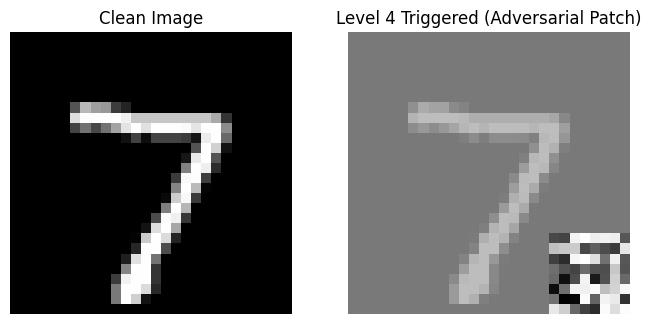

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os

from torchvision import datasets, transforms

# Load MNIST sample
transform = transforms.ToTensor()
test_ds = datasets.MNIST("./data", train=False, download=True, transform=transform)

sample_img, _ = test_ds[0]
clean = sample_img.squeeze().numpy()

plt.figure(figsize=(4,4))
plt.title("Original Sample")
plt.imshow(clean, cmap="gray")
plt.axis("off")
plt.show()


# -------------------------------
# IMPORT TRIGGERS
# -------------------------------
from triggers import (
    add_pixel_trigger,
    add_invisible_noise_trigger,
    semantic_blur_trigger,
    apply_adversarial_patch
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ============================================================
# LEVEL 1 VISUALIZATION
# ============================================================
triggered_l1 = add_pixel_trigger(sample_img).squeeze().numpy()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Clean Image")
plt.imshow(clean, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Level 1 Triggered")
plt.imshow(triggered_l1, cmap="gray")
plt.axis("off")

plt.show()


# ============================================================
# LEVEL 2 VISUALIZATION (Invisible Noise)
# ============================================================
triggered_l2 = add_invisible_noise_trigger(sample_img).squeeze().numpy()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Clean Image")
plt.imshow(clean, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Level 2 Triggered (Invisible Noise)")
plt.imshow(triggered_l2, cmap="gray")
plt.axis("off")

plt.show()


# ============================================================
# LEVEL 3 VISUALIZATION (Semantic Blur)
# ============================================================
triggered_l3 = semantic_blur_trigger(sample_img).squeeze().numpy()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Clean Image")
plt.imshow(clean, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Level 3 Triggered (Semantic Blur)")
plt.imshow(triggered_l3, cmap="gray")
plt.axis("off")

plt.show()


# ============================================================
# LEVEL 4 VISUALIZATION (Adversarial Patch)
# ============================================================

# --- Load Patch File ---
patch_paths = ["patch.pth", "notebooks/patch.pth"]

patch = None
for p in patch_paths:
    if os.path.exists(p):
        patch = torch.load(p, map_location=device)
        break

if patch is None:
    raise FileNotFoundError("❌ Không tìm thấy patch.pth — hãy chạy Level 4 để tạo patch trước.")

print("✅ Loaded patch:", patch.shape)

# Apply patch
patched = apply_adversarial_patch(sample_img.unsqueeze(0).to(device), patch)
patched = patched.squeeze().cpu().detach().numpy()   # <-- FIX IMPORTANT


# Plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Clean Image")
plt.imshow(clean, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Level 4 Triggered (Adversarial Patch)")
plt.imshow(patched, cmap="gray")
plt.axis("off")

plt.show()
